In [1]:
import numpy
import math
from scipy import integrate
from matplotlib import pyplot

In [2]:
%matplotlib inline

### Numerical solution

In [3]:
T = 100.0
dt = 0.02
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

In [4]:
# initial conditions
z0 = 100.   #altitude
b0 = 10.    #upward velocity  resulting from gust
zt = 100.
g = 9.81

u = numpy.array([z0, b0])

# initialize an array to hold the changing elevation values
z = numpy.zeros(N)
z[0] = z0

In [5]:
# time-loop using eulers method
for n in range(1,N):
    u = u + dt*numpy.array([u[1],g*(1-u[0]/zt)])
    z [n] = u [0]

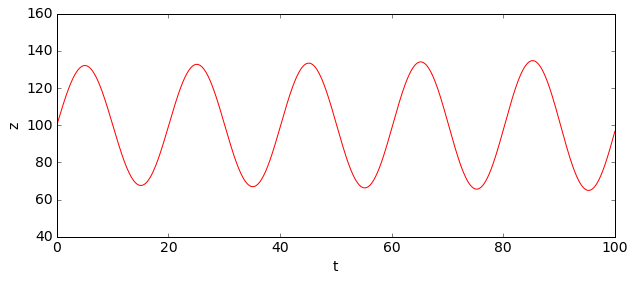

In [6]:
pyplot.figure(figsize=(10,4))                     # set plot size
pyplot.ylim(40,160)                               # y-axis plot limits
pyplot.tick_params(axis='both', labelsize = 14)   # increase font size for ticks
pyplot.xlabel('t', fontsize=14)                   # xlabel
pyplot.ylabel('z', fontsize=14)                   # ylabel
pyplot.plot(t,z,'k-', color = 'Red');

### Exact Solution

In [7]:
z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+(z0-zt)*numpy.cos((g/zt)**.5*t)+zt
          

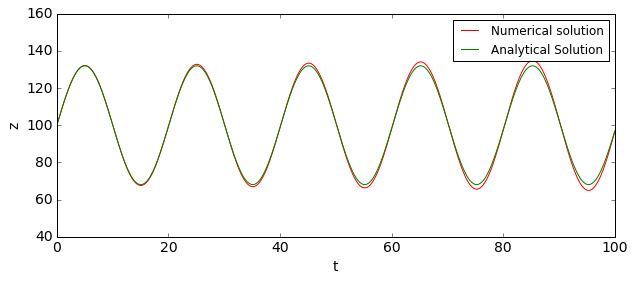

In [8]:
pyplot.figure(figsize=(10,4)) 
pyplot.ylim(40,160)                            #y-axis plot limits
pyplot.tick_params(axis='both',labelsize = 14) #increase font size for ticks
pyplot.xlabel('t',fontsize=14)                 #x label
pyplot.ylabel('z',fontsize=14)                 #y label
pyplot.plot(t,z, color = "red")
pyplot.plot(t,z_exact, color = "green")
pyplot.legend(['Numerical solution','Analytical Solution']);

In [9]:
# time increment array
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

# array that will contain solution of each grid
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1    # number of time-steps
    ### discretize the time using numpy.linspace()
    t = numpy.linspace(0.0, T, N)
    
    #initial conditions
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    # time loop - euler method
    for n in range(1,N):
        ### compute next solution using Euler method ###
        u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u [0] # store the elevation at time step n+1
        
    z_values[i] = z.copy()   #store the total elevation calculation grid i

In [10]:
def get_error(z,dt):
    
    N = len(z)
    t = numpy.linspace(0.0,T,N)
    
    z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
              (z0-zt)*numpy.cos((g/zt)**.5*t)+zt
        
    return dt * numpy.sum(numpy.abs(z-z_exact))

In [11]:
error_values = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    error_values[i] = get_error(z_values[i], dt)

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

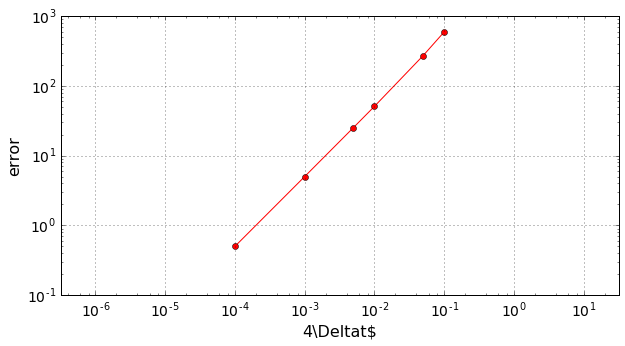

In [12]:
pyplot.figure(figsize=(10,5))
pyplot.tick_params(axis='both', labelsize = 14)
pyplot.grid(True)
pyplot.xlabel('4\Deltat$',fontsize=16)
pyplot.ylabel('error',fontsize=16)
pyplot.loglog(dt_values, error_values, 'ko-', color = 'Red')
pyplot.axis('equal')